In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("seismic-bumps.csv")

In [3]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


## Feature preprocessing (light)

In [4]:
#remove useless variables from the dataset
column2drop = ['seismoacoustic', 'gdpuls', 'hazard','nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy']
df.drop(column2drop, axis=1, inplace=True)

In [5]:
df.head()

,seismic,shift,genergy,gpuls,gdenergy,nbumps,class
0,a,N,15180,48,-72,0,0
1,a,N,14720,33,-70,1,0
2,a,N,8050,30,-81,0,0
3,a,N,28820,171,-23,1,0
4,a,N,12640,57,-63,0,0


## Pattern mining preprocessing

In [6]:
#numero tra parentesi è numero di bin, divide in quartili
df['genergyBin'] = pd.qcut(df['genergy'], 4)
df['gpulsBin'] = pd.qcut(df['gpuls'], 4)
df['gdenergyBin'] = pd.qcut(df['gdenergy'], 4)

df.drop(['gdenergy', 'genergy', 'gpuls'], axis=1, inplace=True)

In [7]:
df.head()

,seismic,shift,nbumps,class,genergyBin,gpulsBin,gdenergyBin
0,a,N,0,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]"
1,a,N,1,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]"
2,a,N,0,0,"(99.999, 11660.0]","(1.999, 190.0]","(-96.001, -37.0]"
3,a,N,1,0,"(25485.0, 52832.5]","(1.999, 190.0]","(-37.0, -6.0]"
4,a,N,0,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]"


In [8]:
df['genergyBin'] = df['genergyBin'].astype(str) + '_gene'
df['gdenergyBin'] = df['gdenergyBin'].astype(str) + '_gdene'
df['gpulsBin'] = df['gpulsBin'].astype(str) + '_gpuls'

In [9]:
class_dict = {0: 'non hazardous', 1: 'hazardous'}
df['class'] = df['class'].map(class_dict)

In [10]:
# Transform categorical attributes ('seismic' and 'shift') into numerical ones 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['seismic'] = le.fit_transform(df['seismic'])
df['shift'] = le.fit_transform(df['shift'])

In [11]:
seismic_dict = {0: 'lack of hazard', 1: 'low hazard'}
df['seismic'] = df['seismic'].map(seismic_dict)

shift_dict = {0: 'coal-getting', 1: 'preparation'}
df['shift'] = df['shift'].map(shift_dict)

In [12]:
df.head()

,seismic,shift,nbumps,class,genergyBin,gpulsBin,gdenergyBin
0,lack of hazard,coal-getting,0,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene"
1,lack of hazard,coal-getting,1,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene"
2,lack of hazard,coal-getting,0,non hazardous,"(99.999, 11660.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene"
3,lack of hazard,coal-getting,1,non hazardous,"(25485.0, 52832.5]_gene","(1.999, 190.0]_gpuls","(-37.0, -6.0]_gdene"
4,lack of hazard,coal-getting,0,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene"


In [13]:
X = df.values.tolist()

In [14]:
X[0]

['lack of hazard',
 'coal-getting',
 0,
 'non hazardous',
 '(11660.0, 25485.0]_gene',
 '(1.999, 190.0]_gpuls',
 '(-96.001, -37.0]_gdene']

In [ ]:
Y = df.values
Z = Y[df['class']=='hazardous']
Z

In [15]:
#!pip install pyfim
from fim import apriori

In [16]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [17]:
#supp=2 ; 0.02
#supp=20 ; 0.2

itemsets = apriori(X, target='s', supp=2, zmin=3, report='S')

In [18]:
itemsets[:5]

[((4, 'non hazardous', 'preparation'), 2.28328173374613),
 ((3, '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene'),
  2.2058823529411766),
 ((3, '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene', 'preparation'),
  2.1671826625387),
 ((3, '(669.0, 4518.0]_gpuls', 'preparation'), 2.28328173374613),
 ((3, '(52832.5, 2595650.0]_gene', 'preparation'), 2.825077399380805)]

In [19]:
# frequent itemset
itemsets[0][0]

(4, 'non hazardous', 'preparation')

In [20]:
# support
itemsets[0][1]

2.28328173374613

In [21]:
#maximal
itemsets = apriori(X, target='m', supp=2, zmin=3, report='S')

In [22]:
itemsets[:5]

[((4, 'preparation', 'non hazardous'), 2.28328173374613),
 ((3, '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene', 'preparation'),
  2.1671826625387),
 ((3, '(52832.5, 2595650.0]_gene', 'non hazardous'), 2.0123839009287927),
 ((3, 'low hazard', 'preparation'), 2.4380804953560373),
 ((3, 'preparation', 'lack of hazard'), 2.244582043343653)]

In [23]:
itemsets[0][0]

(4, 'preparation', 'non hazardous')

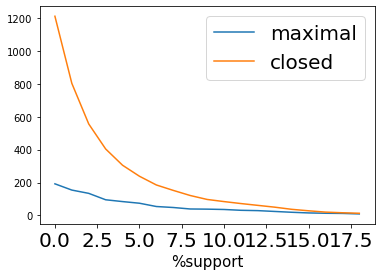

In [24]:
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

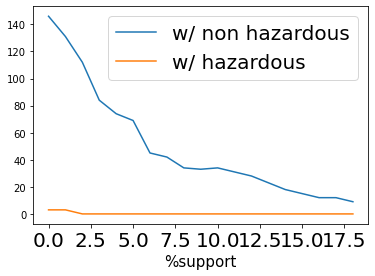

In [25]:
filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'non hazardous' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'hazardous' in item[0]]) )
    
plt.plot(filter_1, label='w/ non hazardous')
plt.plot(filter_2, label='w/ hazardous')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

In [26]:
rules = apriori(X, target='r', supp=10, zmin=3, conf=60, report='aScl')

In [27]:
rules[:5]

[('non hazardous',
  (1, 'preparation'),
  374,
  14.473684210526317,
  0.9396984924623115,
  1.0058744426357138),
 ('preparation',
  (1, 'non hazardous'),
  374,
  14.473684210526317,
  0.6596119929453262,
  1.02491725181643),
 ('non hazardous',
  (1, 'lack of hazard'),
  368,
  14.241486068111456,
  0.9558441558441558,
  1.0231571245655753),
 ('lack of hazard',
  (1, 'non hazardous'),
  368,
  14.241486068111456,
  0.6490299823633157,
  0.9970829217757478),
 ('lack of hazard',
  ('(-37.0, -6.0]_gdene', 0, 'non hazardous'),
  235,
  9.094427244582043,
  0.6791907514450867,
  1.043417896393641)]

In [28]:
# <--
rules[0][0], rules[0][1]

('non hazardous', (1, 'preparation'))

In [29]:
# asbolute support
rules[0][2]

374

In [30]:
# support as percentage
rules[0][3]

14.473684210526317

In [31]:
# confidence
rules[0][4]

0.9396984924623115

In [32]:
# lift
rules[0][5]

1.0058744426357138

In [33]:
for r in rules:
    if r[0] == 'non hazardous':
        print(r)

('non hazardous', (1, 'preparation'), 374, 14.473684210526317, 0.9396984924623115, 1.0058744426357138)
('non hazardous', (1, 'lack of hazard'), 368, 14.241486068111456, 0.9558441558441558, 1.0231571245655753)
('non hazardous', ('(-37.0, -6.0]_gdene', 0), 346, 13.390092879256965, 0.9801699716713881, 1.0491960260144435)
('non hazardous', ('(-37.0, -6.0]_gdene', 'preparation'), 392, 15.170278637770899, 0.9074074074074074, 0.9713093375065206)
('non hazardous', ('(-37.0, -6.0]_gdene', 'lack of hazard'), 394, 15.247678018575852, 0.9563106796116505, 1.0236565021195132)
('non hazardous', ('(-6.0, 38.0]_gdene', 0), 345, 13.351393188854487, 0.9691011235955056, 1.0373476815951892)
('non hazardous', ('(-6.0, 38.0]_gdene', 'preparation', 'lack of hazard'), 243, 9.404024767801857, 0.9204545454545454, 0.9852752880921894)
('non hazardous', ('(-6.0, 38.0]_gdene', 'preparation'), 403, 15.595975232198143, 0.9117647058823529, 0.975973487986744)
('non hazardous', ('(-6.0, 38.0]_gdene', 'lack of hazard'), 4

In [34]:
[r for r in rules if r[0] == 'non hazardous'][0]

('non hazardous',
 (1, 'preparation'),
 374,
 14.473684210526317,
 0.9396984924623115,
 1.0058744426357138)

In [35]:
print( 'to_predict:', [r for r in rules if r[0] == 'non hazardous'][0][0])
print( 'how?', [r for r in rules if r[0] == 'non hazardous'][0][1])

to_predict: non hazardous
how? (1, 'preparation')


In [36]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [37]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

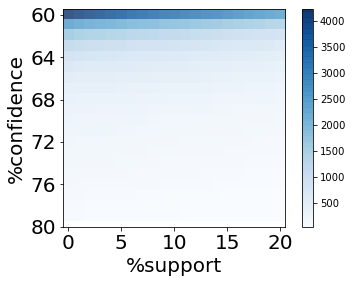

In [38]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()